# Adaptive PMC ABC
This example shows you how to perform adaptive PMC ABC on a time series from the stochastic degradation model.


In [14]:
import pints
import pints.toy as toy
import pints.plot
import pints.toy.stochastic
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)

# Load a forward model
model = toy.stochastic.DegradationModel()

# Create some toy data
real_parameters = model.suggested_parameters()
times = np.linspace(0, 10, 20)
values = model.simulate(real_parameters, times)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a uniform prior parameter
log_prior = pints.UniformLogPrior([0.0], [0.3])


# Set the error measure to be used to compare simulated to observed data
error_measure = pints.RootMeanSquaredError(problem)

## Fit using Rejection ABC

In [25]:
np.random.seed(1)

abc = pints.ABCController(error_measure, log_prior, method=pints.ABCAdaptivePMC)

# set threshold
abc.sampler().set_N_l(200)

# set p_acc_min
abc.sampler().set_p_acc_min(0.03)

# set target number of samples
abc.set_nr_samples(400)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using ABC-Adaptive-PMC
Running in sequential mode.
w_mean=[0.14563061]
epsilon=2.8106938645110393
w_mean=[0.13980478]
epsilon=2.23606797749979
w_mean=[0.13369531]
epsilon=2.0124611797498106
w_mean=[0.13252792]
epsilon=1.8027756377319946
w_mean=[0.13236781]
epsilon=1.6881943016134133
w_mean=[0.13601438]
epsilon=1.61245154965971
w_mean=[0.13644809]
epsilon=1.5329709716755893
w_mean=[0.1346089]
epsilon=1.4832396974191326
w_mean=[0.13380614]
epsilon=1.449137674618944
w_mean=[0.1336381]
epsilon=1.4142135623730951
w_mean=[0.13404377]
epsilon=1.3784048752090223
w_mean=[0.13321135]
epsilon=1.3416407864998738
w_mean=[0.13026348]
epsilon=1.3228756555322954
w_mean=[0.13099878]
epsilon=1.3038404810405297
w_mean=[0.13063436]
epsilon=1.284523257866513
w_mean=[0.12991318]
epsilon=1.2649110640673518
w_mean=[0.12832569]
epsilon=1.2449899597988732
w_mean=[0.12833285]
epsilon=1.2449899597988732
w_mean=[0.12815517]
epsilon=1.224744871391589
w_mean=[0.12573829]
epsilon=1.224744871391589
w_mean=[

## Plot approximate posterior vs actual parameter value

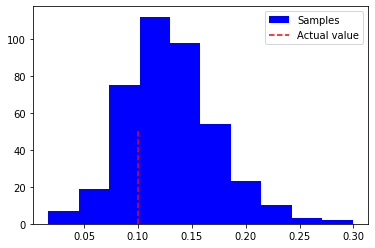

In [24]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=model.suggested_parameters(), linestyles='dashed', ymin=0, ymax=50, label="Actual value", color="red")
plt.legend()
plt.show()

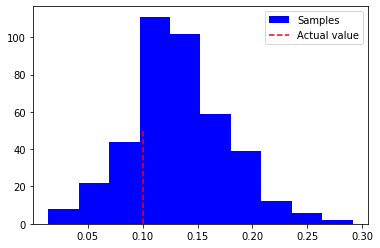

In [26]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=model.suggested_parameters(), linestyles='dashed', ymin=0, ymax=50, label="Actual value", color="red")
plt.legend()
plt.show()